<a href="https://colab.research.google.com/github/Cgaz275/PTDL/blob/munny/PTDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas seaborn Bokeh matplotlib

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.layouts import column
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CheckboxGroup, CustomJS
from bokeh.io import output_notebook

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Contents/HR_comma_sep.csv")

# L√†m s·∫°ch d·ªØ li·ªáu
*  Ki·ªÉm tra c√°c gi√° tr·ªã null
*  Ki·ªÉm tra d·ªØ li·ªáu tr√πng l·∫Øp






In [ ]:
#Ki·ªÉm tra t·ªïng c√°c gi√° tr·ªã null trong m·ªói thu·ªôc t√≠nh
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [ ]:
#Lo·∫°i b·ªè d·ªØ li·ªáu c√≥ gi√° tr·ªã null
df.dropna(inplace=True)

In [ ]:
#Ki·ªÉm tra tr√πng l·∫Øp
df.duplicated().sum()

np.int64(3008)

In [ ]:
#Lo·∫°i b·ªè c√°c gi√° tr·ªã tr√πng
df.drop_duplicates(inplace=True)

# N·ªôi dung 1 - Ch√¢u Gia Anh


In [ ]:
#Ki·ªÉm tra t·ªïng s·ªë c·ªôt v√† h√†ng c·ªßa d·ªØ li·ªáu : (h√†ng, c·ªôt)
df.shape

(11991, 10)

In [ ]:
# C√°c th√¥ng tin v·ªÅ ki·ªÉu d·ªØ li·ªáu, t√™n tr∆∞·ªùng
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [ ]:
# Mi√™u t·∫£ c√°c th√¥ng s·ªë c∆° b·∫£n c·ªßa d·ªØ li·ªáu
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        11991.000000     11991.000000    11991.000000   
mean             0.629658         0.716683        3.802852   
std              0.241070         0.168343        1.163238   
min              0.090000         0.360000        2.000000   
25%              0.480000         0.570000        3.000000   
50%              0.660000         0.720000        4.000000   
75%              0.820000         0.860000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          11991.000000        11991.000000   11991.000000  11991.000000   
mean             200.473522            3.364857       0.154282      0.166041   
std               48.727813            1.330240       0.361234      0.372133   
min               96.000000            2.000000       0.000000      0.000000   
25%              157.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              243.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           11991.000000  
mean                0.016929  
std                 0.129012  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

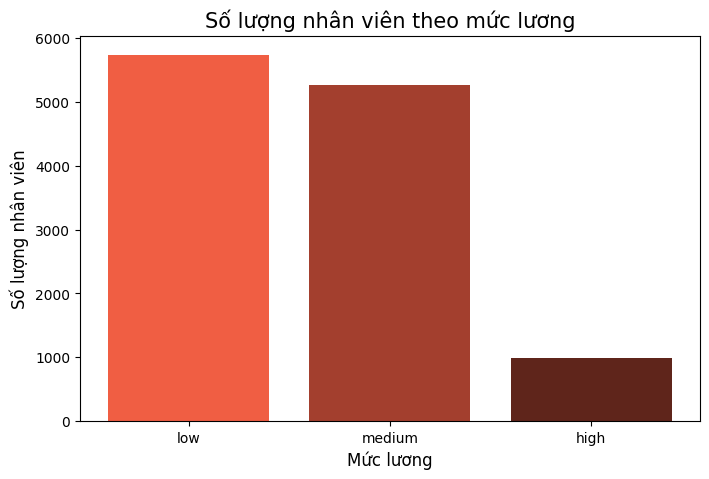

In [ ]:
# ƒê·∫øm s·ªë l∆∞·ª£ng nh√¢n vi√™n theo t·ª´ng m·ª©c l∆∞∆°ng
salary_counts = df['salary'].value_counts()

# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt
plt.figure(figsize=(8, 5))
plt.bar(salary_counts.index, salary_counts.values, color=['#F05E43', '#A33F2E', '#5F251B'])

# Th√™m ti√™u ƒë·ªÅ v√† nh√£n
plt.xlabel("M·ª©c l∆∞∆°ng", size = 12)
plt.ylabel("S·ªë l∆∞·ª£ng nh√¢n vi√™n", size = 12)
plt.title("S·ªë l∆∞·ª£ng nh√¢n vi√™n theo m·ª©c l∆∞∆°ng", size = 15)

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

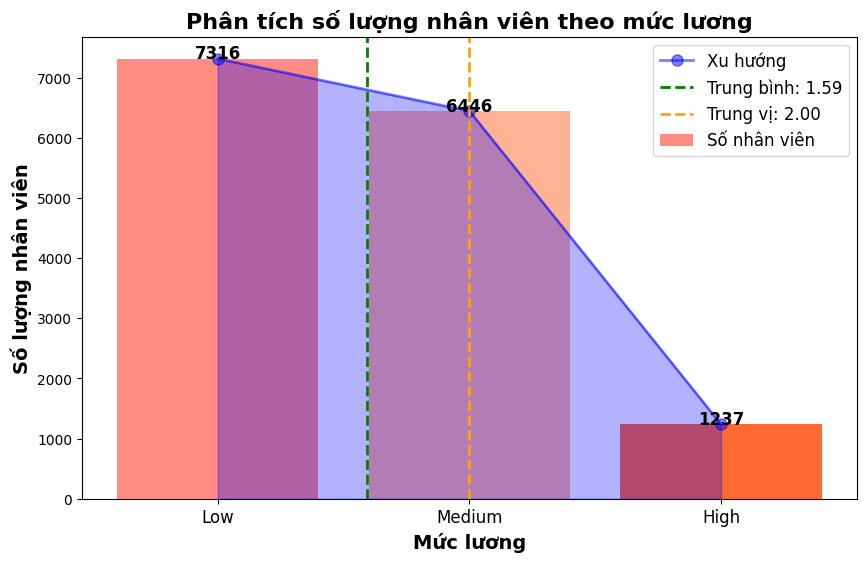

In [5]:
# B∆Ø·ªöC 1: Chuy·ªÉn ƒë·ªïi m·ª©c l∆∞∆°ng sang s·ªë
salary_mapping = {'low': 1, 'medium': 2, 'high': 3}
df['salary'] = df['salary'].map(salary_mapping)

# B∆Ø·ªöC 2: ƒê·∫øm s·ªë l∆∞·ª£ng nh√¢n vi√™n theo m·ª©c l∆∞∆°ng
salary_counts = df['salary'].value_counts().sort_index()

# B∆Ø·ªöC 3: T√≠nh to√°n th·ªëng k√™ c∆° b·∫£n
mean_salary = df['salary'].mean()
median_salary = df['salary'].median()
std_salary = df['salary'].std()
mode_salary = salary_counts.idxmax() if not salary_counts.empty else None  # Ki·ªÉm tra tr√°nh l·ªói

# B∆Ø·ªöC 4: V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(10, 6))

# V·∫Ω c·ªôt
bars = plt.bar(salary_counts.index, salary_counts.values, color=['#FF6F61', '#FFA07A', '#FF4500'], label="S·ªë nh√¢n vi√™n", alpha=0.8)

# V·∫Ω ƒë∆∞·ªùng xu h∆∞·ªõng
x_vals = salary_counts.index
y_vals = salary_counts.values
plt.plot(x_vals, y_vals, marker='o', linestyle='-', color='blue', markersize=8, linewidth=2, label="Xu h∆∞·ªõng", alpha = 0.5)

# V·∫Ω v√πng b√≥ng d∆∞·ªõi ƒë∆∞·ªùng xu h∆∞·ªõng
plt.fill_between(x_vals, y_vals, color='blue', alpha=0.3)

# ƒê√°nh d·∫•u m·ª©c l∆∞∆°ng ph·ªï bi·∫øn nh·∫•t
if mode_salary is not None:
    for bar in bars:
        if bar.get_x() == mode_salary:
            bar.set_color("#D72638")  # M√†u ƒë·ªè n·ªïi b·∫≠t

# Th√™m nh√£n gi√° tr·ªã tr√™n t·ª´ng c·ªôt & ƒëi·ªÉm xu h∆∞·ªõng
for i, txt in enumerate(y_vals):
    plt.text(x_vals[i], y_vals[i] + 0.4, f"{txt}", ha='center', fontsize=12, color='black', fontweight='bold')

# Th√™m ƒë∆∞·ªùng trung b√¨nh & trung v·ªã
plt.axvline(mean_salary, color="green", linestyle="--", lw=2, label=f"Trung b√¨nh: {mean_salary:.2f}")
plt.axvline(median_salary, color="orange", linestyle="--", lw=2, label=f"Trung v·ªã: {median_salary:.2f}")

# Ho√†n thi·ªán bi·ªÉu ƒë·ªì
plt.xlabel("M·ª©c l∆∞∆°ng", fontsize=14, fontweight='bold')
plt.ylabel("S·ªë l∆∞·ª£ng nh√¢n vi√™n", fontsize=14, fontweight='bold')
plt.title("Ph√¢n t√≠ch s·ªë l∆∞·ª£ng nh√¢n vi√™n theo m·ª©c l∆∞∆°ng", fontsize=16, fontweight='bold')

# ƒê·ªïi nh√£n tr·ª•c X th√†nh ch·ªØ
plt.xticks(ticks=[1, 2, 3], labels=['Low', 'Medium', 'High'], fontsize=12)

# Hi·ªÉn th·ªã ch√∫ th√≠ch
plt.legend(fontsize=12)

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

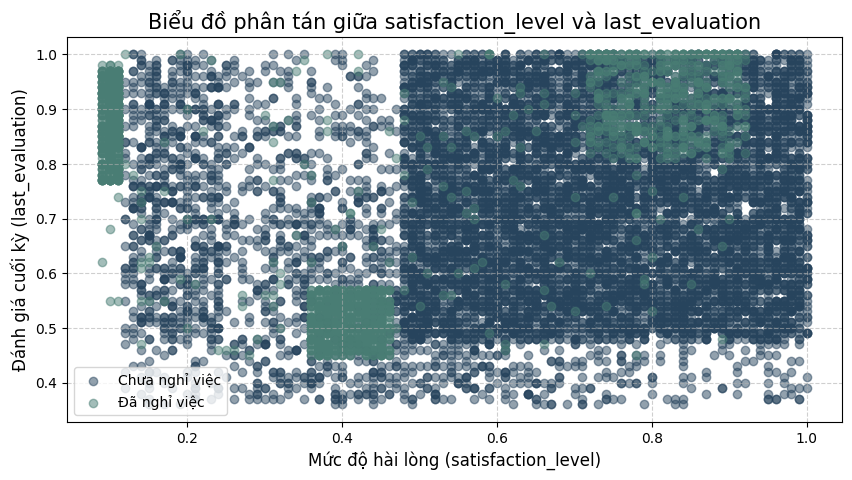

In [ ]:
# T·∫°o hai nh√≥m: Nh√¢n vi√™n ƒë√£ ngh·ªâ v√† ch∆∞a ngh·ªâ
df_left = df[df['left'] == 1]  # Nh√¢n vi√™n ƒë√£ ngh·ªâ vi·ªác
df_stay = df[df['left'] == 0]  # Nh√¢n vi√™n v·∫´n l√†m vi·ªác

# V·∫Ω bi·ªÉu ƒë·ªì scatter
plt.figure(figsize=(10, 5))
plt.scatter(df_stay['satisfaction_level'], df_stay['last_evaluation'],
            color='#27445D', alpha=0.5, label="Ch∆∞a ngh·ªâ vi·ªác")
plt.scatter(df_left['satisfaction_level'], df_left['last_evaluation'],
            color='#497D74', alpha=0.5, label="ƒê√£ ngh·ªâ vi·ªác")

# Th√™m ti√™u ƒë·ªÅ v√† nh√£n
plt.xlabel("M·ª©c ƒë·ªô h√†i l√≤ng (satisfaction_level)", size = 12)
plt.ylabel("ƒê√°nh gi√° cu·ªëi k·ª≥ (last_evaluation)", size = 12)
plt.title("Bi·ªÉu ƒë·ªì ph√¢n t√°n gi·ªØa satisfaction_level v√† last_evaluation", size = 15)
plt.legend()  # Hi·ªÉn th·ªã ch√∫ th√≠ch
plt.grid(True, linestyle="--", alpha=0.6)  # Th√™m l∆∞·ªõi gi√∫p d·ªÖ nh√¨n

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

# N·ªôi dung 2 - ƒê√†o Th·ªã Thanh T√¢m

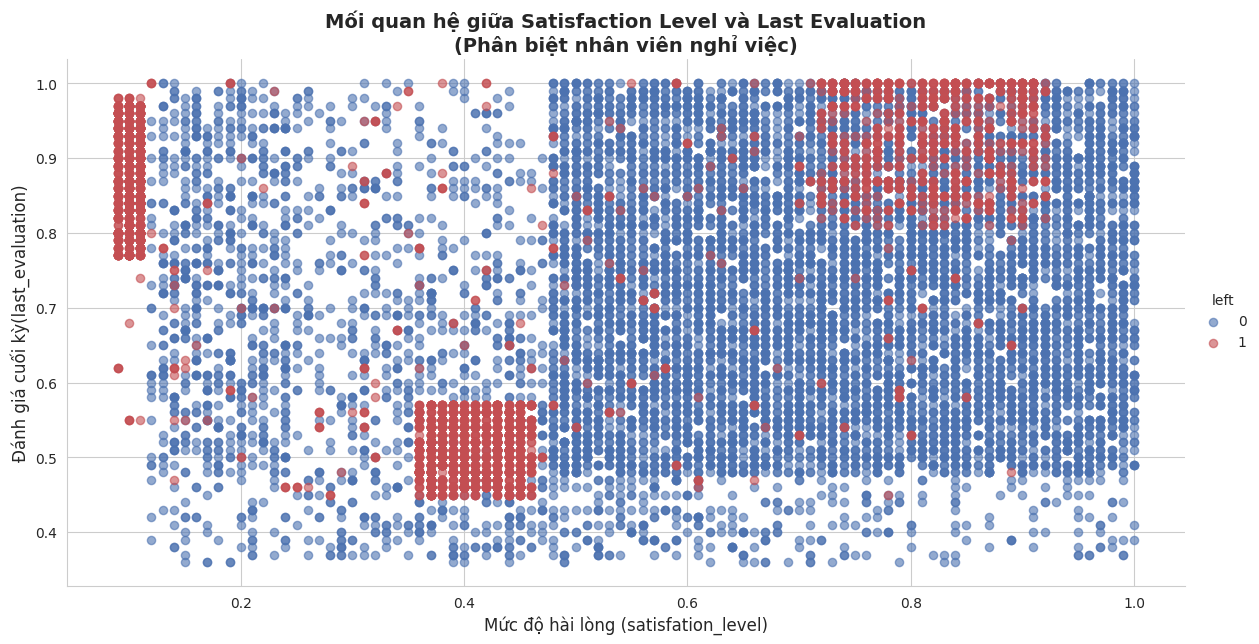

In [ ]:
# im plot
pastel_palette = {0: "#4c72b0", 1: "#c44e52"}
sns.set_style("whitegrid")
sns.lmplot(
    x="satisfaction_level",
    y="last_evaluation",
    data=df,
    fit_reg=False,  # Kh√¥ng v·∫Ω ƒë∆∞·ªùng h·ªìi quy
    hue="left",  # Ph√¢n bi·ªát m√†u theo tr·∫°ng th√°i ngh·ªâ vi·ªác
    palette=pastel_palette,
    height=6,  # Chi·ªÅu cao bi·ªÉu ƒë·ªì
    aspect=2,  # T·ª∑ l·ªá khung h√¨nh (r·ªông h∆°n)
    scatter_kws={'s': 35, 'alpha': 0.6}  # K√≠ch th∆∞·ªõc ƒëi·ªÉm (s), ƒë·ªô trong su·ªët (alpha)
)

# T√πy ch·ªânh nh√£n v√† ti√™u ƒë·ªÅ
plt.xlabel("M·ª©c ƒë·ªô h√†i l√≤ng (satisfation_level)", fontsize=12)
plt.ylabel("ƒê√°nh gi√° cu·ªëi k·ª≥(last_evaluation)", fontsize=12)
plt.title("M·ªëi quan h·ªá gi·ªØa Satisfaction Level v√† Last Evaluation\n(Ph√¢n bi·ªát nh√¢n vi√™n ngh·ªâ vi·ªác)", fontsize=14, fontweight="bold")

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

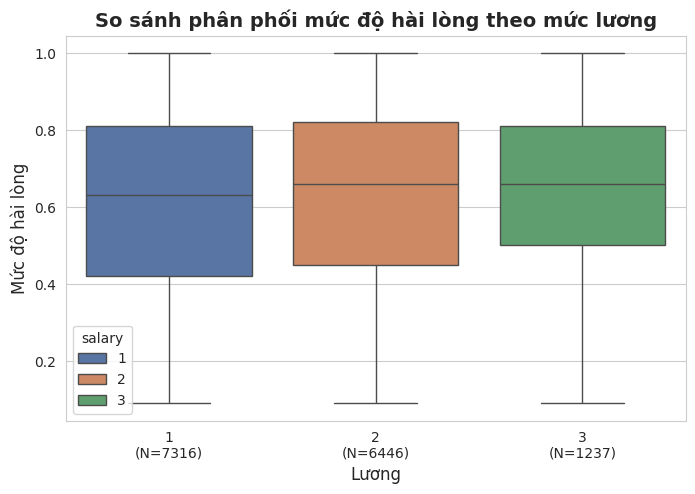

In [11]:
 # box plot
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
ax = sns.boxplot(
    x='salary',
    y='satisfaction_level',
    data=df,
    hue='salary',
    palette="deep",

)
# ƒê·∫øm s·ªë nh√¢n vi√™n theo t·ª´ng m·ª©c l∆∞∆°ng
salary_counts = df['salary'].value_counts().reindex(df['salary'].unique())

# C·∫≠p nh·∫≠t tick labels
ax.set_xticks(range(len(salary_counts)))
ax.set_xticklabels([f"{cat}\n(N={salary_counts[cat]})" for cat in salary_counts.index])

plt.title("So s√°nh ph√¢n ph·ªëi m·ª©c ƒë·ªô h√†i l√≤ng theo m·ª©c l∆∞∆°ng", fontsize=14, fontweight='bold')
plt.xlabel("L∆∞∆°ng", fontsize=12)
plt.ylabel("M·ª©c ƒë·ªô h√†i l√≤ng", fontsize=12)

plt.show()


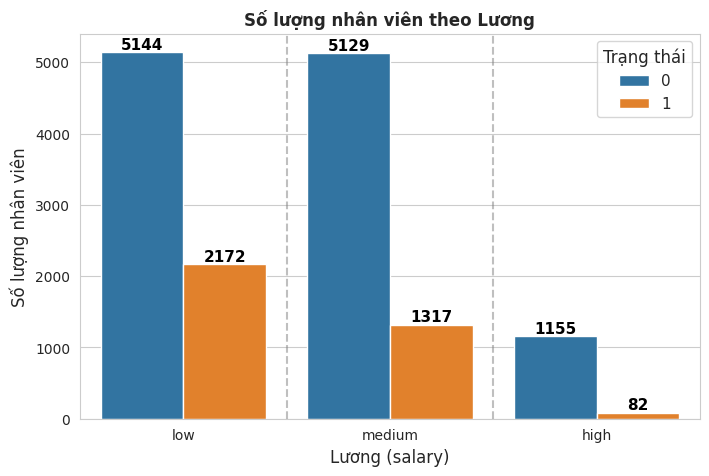

In [ ]:
# count plot
plt.figure(figsize=(8, 5))  # ƒêi·ªÅu ch·ªânh k√≠ch th∆∞·ªõc bi·ªÉu ƒë·ªì
sns.set_style("whitegrid")  # C√†i ƒë·∫∑t ki·ªÉu l∆∞·ªõi
ax = sns.countplot(
    x='salary',
    data=df,
    hue='left')
for p in ax.patches:
    if p.get_height() > 0:  # Ki·ªÉm tra n·∫øu c·ªôt c√≥ gi√° tr·ªã l·ªõn h∆°n 0
        ax.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='bottom',
            fontsize=11, fontweight='bold', color='black'
        )
for x in range(len(df['salary'].unique()) - 1):
    plt.axvline(x + 0.5, color='gray', linestyle='--', alpha=0.5)
plt.title("S·ªë l∆∞·ª£ng nh√¢n vi√™n theo L∆∞∆°ng", fontweight='bold')
plt.xlabel("L∆∞∆°ng (salary)", fontsize=12)
plt.ylabel("S·ªë l∆∞·ª£ng nh√¢n vi√™n", fontsize=12)
plt.legend(title="Tr·∫°ng th√°i", title_fontsize=12, fontsize=11)
plt.show()

#Nh·∫≠n x√©t
**Bi·ªÉu ƒë·ªì Implot**


ƒê·ªëi v·ªõi nh√≥m nh√¢n vi√™n r·ªùi ƒëi:
- Nh√¢n vi√™n nƒÉng l·ª±c t·ªët nh∆∞ng m·ª©c ƒë·ªô h√†i l√≤ng kh√¥ng cao c√≥ nguy c∆° ngh·ªâ vi·ªác cao
- Nh√¢n vi√™n c√≥ hi·ªáu su·∫•t k√©m v√† √≠t h√†i l√≤ng d·ªÖ b·ªã sa th·∫£i ho·∫∑c t·ª± ngh·ªâ vi·ªác
- Nh√¢n vi√™n m·ªõi ch∆∞a ƒë·ªß th·ªùi gian th·ªÉ hi·ªán nƒÉng l·ª±c, nh∆∞ng h√†i l√≤ng v·ªõi m√¥i tr∆∞·ªùng.

ƒê·ªëi v·ªõi nh√≥m ·ªü l·∫°i:
- Nh√¢n vi√™n h√†i l√≤ng v√† c√≥ nƒÉng l·ª±c ·ªïn ƒë·ªãnh th∆∞·ªùng g·∫Øn b√≥ l√¢u d√†i.

Xu h∆∞·ªõng:
- NƒÉng l·ª±c t·ªët nh∆∞ng kh√¥ng h√†i l√≤ng -> d·ªÖ ƒë√°nh m·∫•t nh√¢n t√†i
- NƒÉng l·ª±c th·∫•p v√† h√†i l√≤ng th·∫•p -> hi·ªáu su·∫•t k√©m

Bi·ªÉu ƒë·ªì cho th·∫•y m·ªëi t∆∞∆°ng quan ph·ª©c t·∫°p gi·ªØa m·ª©c ƒë·ªô h√†i l√≤ng, nƒÉng l·ª±c v√† t·ª∑ l·ªá ngh·ªâ vi·ªác.


**Bi·ªÉu ƒë·ªì boxplot**


Xu h∆∞·ªõng:
- M·ª©c ƒë·ªô h√†i l√≤ng t·ª∑ l·ªá thu·∫≠n v·ªõi m·ª©c l∆∞∆°ng -> Nh√¢n vi√™n l∆∞∆°ng cao m·ª©c ƒë·ªô h√†i l√≤ng t·ª´ trung b√¨nh tr·ªü l√™n
- Nh√≥m l∆∞∆°ng th·∫•p c√≥ ph√¢n ph·ªëi l·ªách xu·ªëng d∆∞·ªõi -> Nh√¢n vi√™n l∆∞∆°ng th·∫•p kh√¥ng h√†i l√≤ng

=> L∆∞∆°ng l√† y·∫øu t·ªë quan tr·ªçng ·∫£nh h∆∞·ªüng ƒë·∫øn s·ª± h√†i l√≤ng.


**Bi·ªÉu ƒë·ªì countplot**


Xu h∆∞·ªõng:
- Ph√¢n b·ªë kh√¥ng ƒë·ªÅu, nh√¢n vi√™n ·ªü m·ª©c l∆∞∆°ng th·∫•p chi·∫øm ƒëa s·ªë, trong khi nh√≥m l∆∞∆°ng cao c√≥ √≠t nh√¢n vi√™n nh·∫•t.
- Gi·∫£m d·∫ßn theo m·ª©c l∆∞∆°ng low > medium  > high



*M·ªëi quan h·ªá t·ª´ c√°c bi·ªÉu ƒë·ªì gi·ªØa m·ª©c l∆∞∆°ng, m·ª©c ƒë·ªô h√†i l√≤ng, ƒë√°nh gi√° nƒÉng l·ª±c v√† t·ª∑ l·ªá ngh·ªâ vi·ªác:*

- Nh√≥m l∆∞∆°ng th·∫•p:

Chi·∫øm ƒëa s·ªë trong c√¥ng ty nh∆∞ng c√≥ m·ª©c ƒë·ªô h√†i l√≤ng th·∫•p -> D·ªÖ ngh·ªâ vi·ªác do m·ª©c ƒë·ªô h√†i l√≤ng th·∫•p ho·∫∑c b·ªã sa th·∫£i do hi·ªáu su·∫•t c√¥ng vi·ªác th·∫•p

- Nh√≥m l∆∞∆°ng trung b√¨nh:

C√≥ s·ªë l∆∞·ª£ng nh√¢n vi√™n v·ª´a ph·∫£i v√† m·ª©c ƒë·ªô h√†i l√≤ng cao h∆°n nh√≥m l∆∞∆°ng th·∫•p -> Nh√≥m ·ªïn ƒë·ªãnh, c√≥ th·ªÉ ƒë√†o t·∫°o ƒë·ªÉ thƒÉng ti·∫øn

- Nh√≥m l∆∞∆°ng cao:

Nh√≥m c√≥ s·ªë l∆∞·ª£ng nh√¢n vi√™n √≠t nh·∫•t, c√≥ m·ª©c ƒë·ªô h√†i l√≤ng cao v√† ·ªïn ƒë·ªãnh c√≥ th·ªÉ g·∫Øn b√≥ l√¢u d√†i

# N·ªôi dung 3 - D∆∞∆°ng L√™ Kh√°nh


In [ ]:
output_notebook()

### üìä 1. Bi·ªÉu ƒë·ªì c·ªôt: S·ªë l∆∞·ª£ng nh√¢n vi√™n theo M·ª©c l∆∞∆°ng (salary) ###
salary_counts = df["salary"].value_counts()

bar_source = ColumnDataSource(data={
    'm·ª©c_l∆∞∆°ng': salary_counts.index.tolist(),  # M·ª©c l∆∞∆°ng (salary)
    's·ªë_l∆∞·ª£ng': salary_counts.values.tolist()   # S·ªë l∆∞·ª£ng nh√¢n vi√™n
})

bar_chart = figure(x_range=salary_counts.index.tolist(),
                   title="S·ªë l∆∞·ª£ng nh√¢n vi√™n theo M·ª©c l∆∞∆°ng",
                   x_axis_label="M·ª©c l∆∞∆°ng (salary)",
                   y_axis_label="S·ªë l∆∞·ª£ng nh√¢n vi√™n",
                   width=800, height=400)

bar_chart.vbar(x='m·ª©c_l∆∞∆°ng', top='s·ªë_l∆∞·ª£ng', width=0.6, source=bar_source, color="#FF9800")

### üéØ 2. Bi·ªÉu ƒë·ªì ph√¢n t√°n: M·ª©c ƒë·ªô h√†i l√≤ng (satisfaction_level) vs ƒê√°nh gi√° g·∫ßn nh·∫•t (last_evaluation) ###
color_map = {1: "#F50057", 0: "#00BFA5"}  # 1: ƒê√£ ngh·ªâ vi·ªác, 0: C√≤n l√†m vi·ªác
colors = [color_map[left] for left in df["left"]]

scatter_source = ColumnDataSource(data={
    'm·ª©c_ƒë·ªô_h√†i_l√≤ng': df['satisfaction_level'],  # M·ª©c ƒë·ªô h√†i l√≤ng (satisfaction_level)
    'ƒë√°nh_gi√°_g·∫ßn_nh·∫•t': df['last_evaluation'],  # ƒê√°nh gi√° g·∫ßn nh·∫•t (last_evaluation)
    's·ªë_d·ª±_√°n': df['number_project'],  # S·ªë l∆∞·ª£ng d·ª± √°n (number_project)
    'gi·ªù_l√†m_vi·ªác_tb_th√°ng': df['average_montly_hours'],  # Gi·ªù l√†m trung b√¨nh/th√°ng (average_montly_hours)
    's·ªë_nƒÉm_c√¥ng_t√°c': df['time_spend_company'],  # S·ªë nƒÉm l√†m vi·ªác (time_spend_company)
    'tai_n·∫°n_lao_ƒë·ªông': df['Work_accident'],  # Tai n·∫°n lao ƒë·ªông (Work_accident)
    'ngh·ªâ_vi·ªác': df['left'],  # Ngh·ªâ vi·ªác hay kh√¥ng (left)
    'ƒë∆∞·ª£c_thƒÉng_ch·ª©c_5_nƒÉm': df['promotion_last_5years'],  # ƒê∆∞·ª£c thƒÉng ch·ª©c trong 5 nƒÉm (promotion_last_5years)
    'ph√≤ng_ban': df['sales'],  # Ph√≤ng ban (sales)
    'm·ª©c_l∆∞∆°ng': df['salary'],  # M·ª©c l∆∞∆°ng (salary)
    'm√†u': colors
})

scatter_plot = figure(title="Bi·ªÉu ƒë·ªì ph√¢n t√°n: M·ª©c ƒë·ªô h√†i l√≤ng vs ƒê√°nh gi√° g·∫ßn nh·∫•t",
                      x_axis_label="M·ª©c ƒë·ªô h√†i l√≤ng (satisfaction_level)",
                      y_axis_label="ƒê√°nh gi√° g·∫ßn nh·∫•t (last_evaluation)",
                      width=800, height=500,
                      tools="pan,wheel_zoom,reset")

scatter_plot.scatter('m·ª©c_ƒë·ªô_h√†i_l√≤ng', 'ƒë√°nh_gi√°_g·∫ßn_nh·∫•t', source=scatter_source, size=5, color='m√†u', alpha=0.6)

hover = HoverTool()
hover.tooltips = [
    ("M·ª©c ƒë·ªô h√†i l√≤ng", "@m·ª©c_ƒë·ªô_h√†i_l√≤ng"),
    ("ƒê√°nh gi√° g·∫ßn nh·∫•t", "@ƒë√°nh_gi√°_g·∫ßn_nh·∫•t"),
    ("S·ªë d·ª± √°n", "@s·ªë_d·ª±_√°n"),
    ("Gi·ªù l√†m trung b√¨nh/th√°ng", "@gi·ªù_l√†m_vi·ªác_tb_th√°ng"),
    ("S·ªë nƒÉm c√¥ng t√°c", "@s·ªë_nƒÉm_c√¥ng_t√°c"),
    ("Tai n·∫°n lao ƒë·ªông", "@tai_n·∫°n_lao_ƒë·ªông"),
    ("Ngh·ªâ vi·ªác", "@ngh·ªâ_vi·ªác"),
    ("ThƒÉng ch·ª©c trong 5 nƒÉm", "@ƒë∆∞·ª£c_thƒÉng_ch·ª©c_5_nƒÉm"),
    ("Ph√≤ng ban", "@ph√≤ng_ban"),
    ("M·ª©c l∆∞∆°ng", "@m·ª©c_l∆∞∆°ng")
]
scatter_plot.add_tools(hover)

### üèóÔ∏è X·∫øp d·ªçc 2 bi·ªÉu ƒë·ªì ###
layout = column(bar_chart, scatter_plot)
show(layout)

In [ ]:


output_notebook()  # Hi·ªÉn th·ªã trong Jupyter Notebook

### üéØ Bi·ªÉu ƒë·ªì ph√¢n t√°n: Satisfaction Level vs Last Evaluation ###
color_map = {0: "#7B1FA2", 1: "#00BFA5"}  # 0: T√≠m, 1: Xanh ng·ªçc

# D·ªØ li·ªáu chia theo nh√≥m
df_0 = df[df["left"] == 0]
df_1 = df[df["left"] == 1]

source_0 = ColumnDataSource(data={'x': df_0['satisfaction_level'], 'y': df_0['last_evaluation'], 'salary': df_0['salary']})
source_1 = ColumnDataSource(data={'x': df_1['satisfaction_level'], 'y': df_1['last_evaluation'], 'salary': df_1['salary']})

scatter_plot = figure(title="Scatter Plot: Satisfaction Level vs Last Evaluation",
                      x_axis_label="Satisfaction Level",
                      y_axis_label="Last Evaluation",
                      width=800, height=500,
                      tools="pan,wheel_zoom,reset")

# Th√™m 2 nh√≥m d·ªØ li·ªáu v·ªõi m√†u s·∫Øc kh√°c nhau
scatter_0 = scatter_plot.scatter('x', 'y', source=source_0, size=5, color=color_map[0], alpha=0.6, legend_label="Ch∆∞a ngh·ªâ vi·ªác")
scatter_1 = scatter_plot.scatter('x', 'y', source=source_1, size=5, color=color_map[1], alpha=0.6, legend_label="ƒê√£ ngh·ªâ vi·ªác")

hover = HoverTool()
hover.tooltips = [("Salary", "@salary")]
scatter_plot.add_tools(hover)

### üîò Th√™m Checkbox ƒë·ªÉ ·∫©n/hi·ªán nh√≥m ###
checkbox = CheckboxGroup(labels=["Ch∆∞a ngh·ªâ vi·ªác", "ƒê√£ ngh·ªâ vi·ªác"], active=[0, 1])  # M·∫∑c ƒë·ªãnh c·∫£ 2 ƒë·ªÅu hi·ªÉn th·ªã

# CustomJS ƒë·ªÉ ƒëi·ªÅu khi·ªÉn visibility
callback = CustomJS(args={'scatter_0': scatter_0, 'scatter_1': scatter_1, 'checkbox': checkbox}, code="""
    scatter_0.visible = checkbox.active.includes(0);
    scatter_1.visible = checkbox.active.includes(1);
""")
checkbox.js_on_change("active", callback)

### üèóÔ∏è X·∫øp d·ªçc Checkbox v√† Scatter Plot ###
layout = column(checkbox, scatter_plot)
show(layout)



In [ ]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, RangeSlider, CustomJS
from bokeh.layouts import column
import pandas as pd

output_notebook()

# Load data from CSV
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Contents/HR_comma_sep.csv")

# Determine min and max values for the slider
min_value = df['satisfaction_level'].min()
max_value = df['satisfaction_level'].max()

# Scatter plot - Satisfaction Level vs Last Evaluation
color_map = {0: "#7B1FA2", 1: "#00BFA5"}  # 0: T√≠m, 1: Xanh ng·ªçc
colors = [color_map[left] for left in df["left"]]

scatter_source = ColumnDataSource(data={
    'x': df['satisfaction_level'],
    'y': df['last_evaluation'],
    'salary': df['salary'],
    'left': df['left'].astype(str),
    'color': colors
})

scatter_plot = figure(title="Scatter Plot: Satisfaction Level vs Last Evaluation",
                      x_axis_label="Satisfaction Level",
                      y_axis_label="Last Evaluation",
                      width=800, height=500,
                      tools="pan,wheel_zoom,reset")
scatter_plot.scatter('x', 'y', source=scatter_source, size=5, color='color', alpha=0.6)  # Reduced size from 8 to 5

hover = HoverTool()
hover.tooltips = [("Salary", "@salary"), ("Left", "@left")]
scatter_plot.add_tools(hover)

# RangeSlider widget with JavaScript callback
range_slider = RangeSlider(start=min_value, end=max_value, value=(min_value, max_value), step=0.01, title="Satisfaction Level Range")

slider_callback = CustomJS(args=dict(source=scatter_source, original_source=scatter_source.data), code="""
    var data = source.data;
    var original_data = original_source;
    var range = cb_obj.value;

    var new_x = [];
    var new_y = [];
    var new_salary = [];
    var new_left = [];
    var new_color = [];

    for (var i = 0; i < original_data['x'].length; i++) {
        if (original_data['x'][i] >= range[0] && original_data['x'][i] <= range[1]) {
            new_x.push(original_data['x'][i]);
            new_y.push(original_data['y'][i]);
            new_salary.push(original_data['salary'][i]);
            new_left.push(original_data['left'][i]);
            new_color.push(original_data['color'][i]);
        }
    }

    data['x'] = new_x;
    data['y'] = new_y;
    data['salary'] = new_salary;
    data['left'] = new_left;
    data['color'] = new_color;

    source.change.emit();
""")

range_slider.js_on_change("value", slider_callback)

# Layout
layout = column(range_slider, scatter_plot)
show(layout)



#B√°o c√°o
***Ph·∫ßn 1:***

T·∫≠p d·ªØ li·ªáu g·ªìm 11,991 nh√¢n vi√™n v·ªõi 10 bi·∫øn (2 bi·∫øn ki·ªÉu s·ªë th·ª±c, 6 bi·∫øn ki·ªÉu s·ªë nguy√™n, 2 bi·∫øn ki·ªÉu object).C√°c bi·∫øn ch√≠nh:

- satisfaction_level	M·ª©c ƒë·ªô h√†i l√≤ng c·ªßa nh√¢n vi√™n (0‚Äì1)
- last_evaluation	ƒêi·ªÉm ƒë√°nh gi√° nƒÉng l·ª±c cu·ªëi k·ª≥ (0‚Äì1)
- number_project	S·ªë d·ª± √°n ƒë√£ tham gia trong nƒÉm
- average_montly_hours	S·ªë gi·ªù l√†m vi·ªác trung b√¨nh/th√°ng
- time_spend_company	S·ªë nƒÉm l√†m vi·ªác t·∫°i c√¥ng ty
- Work_accident	C√≥ g·∫∑p tai n·∫°n lao ƒë·ªông kh√¥ng (0: Kh√¥ng, 1: C√≥)
- left	ƒê√£ ngh·ªâ vi·ªác ch∆∞a (0: ·ªû l·∫°i, 1: ƒê√£ ngh·ªâ)
- promotion_last_5years	ƒê∆∞·ª£c thƒÉng ch·ª©c trong 5 nƒÉm g·∫ßn ƒë√¢y (0: Kh√¥ng, 1: C√≥)
- sales	Ph√≤ng ban l√†m vi·ªác
- salary	M·ª©c l∆∞∆°ng


M·ª•c ti√™u ph√¢n t√≠ch: ph√¢n t√≠ch m·ªëi quan h·ªá gi·ªØa satisfaction_level, last_evaluation, salary,... v·ªõi bi·∫øn m·ª•c ti√™u left.

*a. X√°c ƒë·ªãnh y·∫øu t·ªë ·∫£nh h∆∞·ªüng ƒë·∫øn vi·ªác nh√¢n vi√™n ngh·ªâ vi·ªác*

Ki·ªÉm tra m·ª©c ƒë·ªô ·∫£nh h∆∞·ªüng c·ªßa c√°c bi·∫øn ƒë·∫øn quy·∫øt ƒë·ªãnh ngh·ªâ vi·ªác, ƒë·∫∑c bi·ªát l√† satisfaction_level, last_evaluation v√† salary.

*b. Ph√¢n nh√≥m nh√¢n vi√™n c√≥ nguy c∆° ngh·ªâ vi·ªác*

S·ª≠ d·ª•ng k·ªπ thu·∫≠t ph√¢n c·ª•m ƒë·ªÉ x√°c ƒë·ªãnh nh√≥m nh√¢n vi√™n c√≥ kh·∫£ nƒÉng r·ªùi c√¥ng ty d·ª±a tr√™n ƒë·∫∑c ƒëi·ªÉm nh∆∞ m·ª©c l∆∞∆°ng th·∫•p, kh·ªëi l∆∞·ª£ng c√¥ng vi·ªác cao ho·∫∑c kh√¥ng ƒë∆∞·ª£c thƒÉng ch·ª©c.

*c. ƒê·ªÅ xu·∫•t gi·∫£i ph√°p*

D·ª±a tr√™n k·∫øt qu·∫£ ph√¢n t√≠ch, ƒë·ªÅ xu·∫•t chi·∫øn l∆∞·ª£c gi·ªØ ch√¢n nh√¢n t√†i, nh∆∞ c·∫£i thi·ªán ch·∫ø ƒë·ªô l∆∞∆°ng, c√¢n b·∫±ng kh·ªëi l∆∞·ª£ng c√¥ng vi·ªác v√† n√¢ng cao s·ª± h√†i l√≤ng c·ªßa nh√¢n vi√™n.


***Ph·∫ßn 2***

